# Multidimensional Integral Estimation using Monte Carlo with Uniform Sampling
This notebook demonstrates how to estimate a multidimensional integral using standard Monte Carlo integration with uniform random sampling.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# User-defined function to integrate (default: exp(-sum(x**2)))
def integrand(x):
    x = np.asarray(x)
    return np.exp(-np.sum(x**2, axis=-1))

In [8]:
# Monte Carlo integration for multidimensional case
def monte_carlo_integral(integrand, bounds, N):
    d = len(bounds[0])
    low = np.array(bounds[0])
    high = np.array(bounds[1])
    samples = np.random.uniform(low, high, size=(N, d))
    vol = np.prod(high - low)
    values = integrand(samples)
    estimate = vol * np.mean(values)
    std_error = vol * np.std(values) / np.sqrt(N)
    return estimate, std_error

# Example Usage

In [12]:
# Example usage: 3D integral over [-3, 3]^3
D = 6
N = 100_000
bounds = [np.full(D, -3), np.full(D, 3)]

estimate, std_error = monte_carlo_integral(integrand, bounds, N)
print(f"Estimated integral in {D}D: {estimate} ± {std_error}")
print("Actual value is ", np.pi ** (D/2))

Estimated integral in 6D: 32.194945397756165 ± 1.3879379425754235
Actual value is  31.006276680299816


You can change the value of `D`, the integration bounds, and the function `integrand` to try different multidimensional integrals. The code uses uniform random sampling for standard Monte Carlo integration.

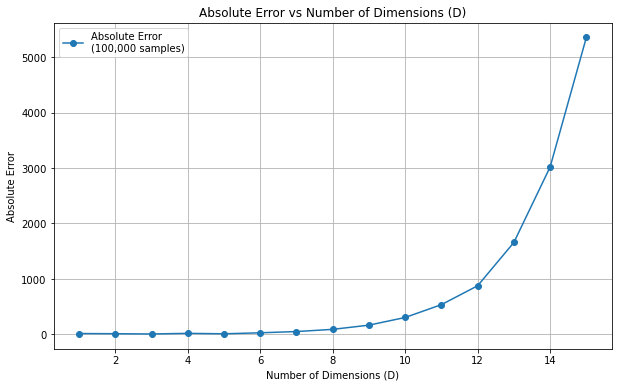

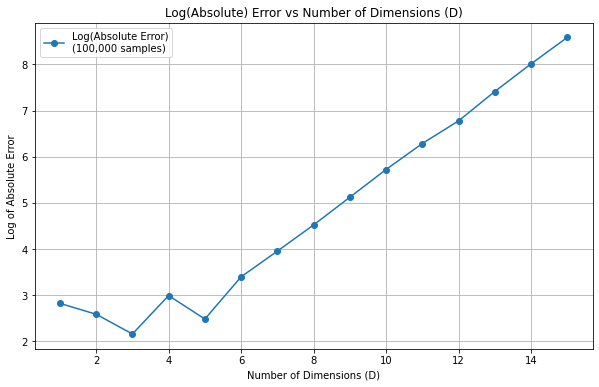

In [36]:
# Calculate and plot absolute error for N in range 1 to 15
D_values = range(1, 16)
absolute_errors = []

for D in D_values:
    actual_value = np.pi ** (D / 2)
    estimate, _ = monte_carlo_integral(integrand, bounds, N)
    absolute_error = abs(actual_value - estimate)
    absolute_errors.append(absolute_error)

plt.figure(figsize=(10, 6))
plt.ylabel('Absolute Error')
plt.plot(D_values, absolute_errors, marker='o', label='Absolute Error\n(100,000 samples)')
plt.xlabel('Number of Dimensions (D)')
plt.title('Absolute Error vs Number of Dimensions (D)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.ylabel('Log of Absolute Error')
plt.plot(D_values, np.log(absolute_errors), marker='o', label='Log(Absolute Error)\n(100,000 samples)')
plt.xlabel('Number of Dimensions (D)')
plt.title('Log(Absolute) Error vs Number of Dimensions (D)')
plt.grid(True)
plt.legend()
plt.show()